In [107]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import sys
%matplotlib inline

In [167]:
import seaborn as sns

In [129]:
train = pd.read_csv("C://Users//Aswin//CS224n//Text Classification//train.csv")
test = pd.read_csv("C://Users//Aswin//CS224n//Text Classification//test.csv")

In [130]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [132]:
train['tweet'][1]

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'

In [133]:
train['tweet'][3]

"I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/"

In [134]:
combined = train.append(test, ignore_index = True)

In [135]:
combined.shape

(9873, 3)

In [136]:
for i in range(11, 21):
    print(combined['tweet'][i])
    print('\n')

Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade


Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo


I just made another crazy purchase lol my theory is 'Work hard, Play Hard' Lol #iPad #Apple #Shopping http://instagr.am/p/NUyFHvyE7I/


@shaqlockholmes @sam_louise1991 the battery is so painful! I charge it overnight and by lunchtime battery is dead! #HateOrange.


From #DeepEllum towards #downtown #Dallas. #BigD #Saturday #RX100M3 #Sony #summer #urban http://instagram.com/p/pzJoOaQqZ4/


Like and Share if you want this 3D Phone Case for Iphone #iphone #s ... https://bestcheapphones.com/index.php/product/2016-new-sweet-3d-mineral-water-bottle-love-ice-cream-phone-case-couples-soft-silicone-rubber-case-for-iphone-7-6-6s-plus-5-5se/ …pic.twitter.com/gFKN0Yec6J


Go crazy !! #iphonesia, #iphone, #instagood, #instagram, #photooftheday, #tweegram, ,… 

In [137]:
#remove user handles
#remove special characters
#remove email addresses
#remove stop words
#stemming and lematization

In [138]:
def remove_pattern(text, pattern):
    tex = re.findall(pattern, text)
    for w in tex:
        text = re.sub(w, '', text)
    return text

# Removing Twitter Handles (eg : @Apple)

In [139]:
combined['clean text'] = np.vectorize(remove_pattern)(combined['tweet'], '@[\w]*')

In [140]:
for i in range(9873):
    words = combined['clean text'][i].split()
    s = ""
    for word in words:
        if word[0:4] != "http":
            s = s + word + " "
    combined['clean text'][i] = s

C:\Users\Aswin\Anaconda3.7\envs\tf\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Removing Punctuations, Numbers and Special Characters 

In [141]:
combined['clean text'] = combined['clean text'].str.replace('[^a-zA-Z#]', ' ')

# Removing short words (if length is <= 3)

In [142]:
combined['clean text'] = combined['clean text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [143]:
combined.head()

,id,label,tweet,clean text
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps #b...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


# Tokenizing the words

In [144]:
tokenized_text = combined['clean text'].apply(lambda x : x.split())

In [145]:
tokenized_text.head()

0    [#fingerprint, #Pregnancy, Test, #android, #ap...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, #talk, #makememories, #unp...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service, Apple, even, talk, ab...
Name: clean text, dtype: object

# Stemming and Lemmatization

In [127]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [128]:
stemmer = PorterStemmer()
tokenized_text = combined['clean text'].apply(lambda x : [stemmer.stem(i) for i in x])
tokenized_text.head()

0    [#, f, i, n, g, e, r, p, r, i, n, t,  , #, P, ...
1    [F, i, n, a, l, l, y,  , t, r, a, n, s, p, a, ...
2    [l, o, v, e,  , t, h, i, s,  , W, o, u, l, d, ...
3    [w, i, r, e, d,  , k, n, o, w,  , G, e, o, r, ...
4    [W, h, a, t,  , a, m, a, z, i, n, g,  , s, e, ...
Name: clean text, dtype: object

In [146]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])

combined['clean text'] = tokenized_text

In [147]:
combined.head()

,id,label,tweet,clean text
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps #b...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


In [149]:
pip install wordcloud

# Exploring and Visualising the Dataset

Using wordcloud to visualise the most frequent words in the entire dataset

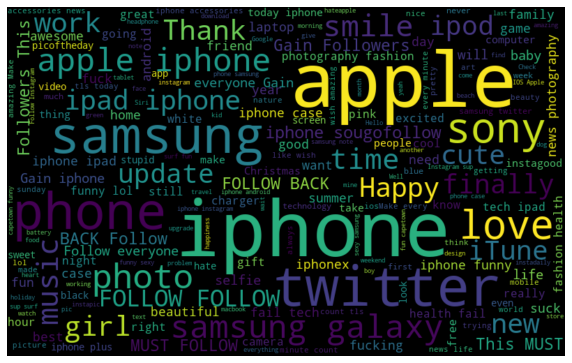

In [150]:
all_words = ' '.join([text for text in combined['clean text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We see that most of the words are neutral or positive towards the product

Visualising the words that are neutral/positive

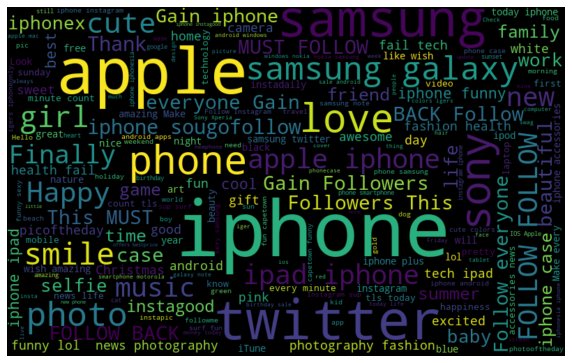

In [151]:
positive_words = ' '.join([text for text in combined['clean text'][combined['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualising the words that are negative

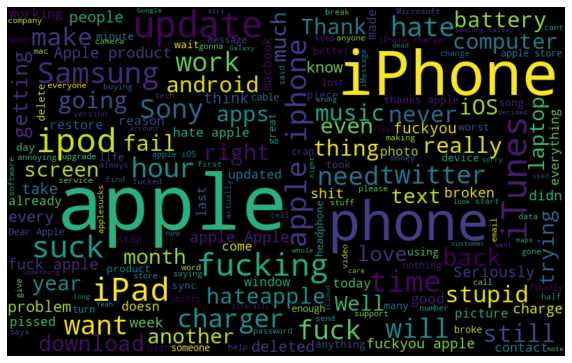

In [152]:
negative_words = ' '.join([text for text in combined['clean text'][combined['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Hashtags often are very much related with the sentiment associated with the tweet. Here, we extract the hashtags and the words after it and analyze it.

In [163]:
def hashtag_extract(text):
    hashtags = []
    for word in text:
        #print(word)
        tt = re.findall(r"#\w+", word)
        hashtags.append(tt)
    return hashtags

In [165]:
# extracting hashtags from neutral/positive tweets

HT_regular = hashtag_extract(combined['clean text'][combined['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combined['clean text'][combined['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

#fingerprint #Pregnancy Test #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
Finally transparant silicon case Thanks uncle #yay #Sony #Xperia #sonyexperias
love this Would #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect
wired know George made that #iphone #cute #daventry #home
Happy #instapic #instadaily #sony #xperia #xperiaZ
Type charger cable #bay #Amazon #etsy Year #Rob Cross #Toby Young #EVEMUN #McMafia #Taylor #SPECTRE #NewYear #Starting #recipes #technology #SamsungGalaxyS #iPhoneX twitter PjIwq
Bout shopping again listening music #iphone #justme #music #likeforlike #followforfollow
Photo #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor
just made another crazy purchase theory Work hard Play Hard #iPad #Apple #Shopping
From #DeepEllum towards #downtown #Dallas #BigD #Saturday #Sony #summer #urban
Like Share want this Phone Case Iphone #iphone twitter gFKN
crazy #iphonesia #iphone #instagoo

#Kids FREE Platypus Doesn Sing #iPhone #iPad
baby #new #apple #iphone #iphone #black #yayness #teamapple #finally #baby
Samsung adapter available store #caradapter #car #Samsung #computers #accessories #gadgets #phones #paccenter #abuja #abujafct #abujapeople #wuse #abujaphones #gadget #abujacity #capitalhub #buy #sales #fct #services #tech #technology retweet uspic twitter hfTYt iYaT
DEAR APPLE PRODUCTS SAMN COMPLICATED RESTART MACBOOK #apple hate iPhone
have just bought birthday present #Whoo #Netbook #Samsung #Birthday #Present
Please Visit #fiverr profile helpful profile Thanks #shopify #news #sports #health #trump #USA #Russi #Food #iphone #android
Exquisite Squishy Random Charm #iPhone Straps #Toys Decor #free #shop #style #sales #today #giveawaypic twitter xsbotxf
FINALLY joining IPhone family tomorrow #apple #iphone #early #christmas
Forward #light #sweden #malm #igdaily #iphone #bestof #instamood #instagram #instagood #instagraphy
Early Birthday Gift thanks natmiaa #virgo #twi

Nouveau portable yeah #new #phone #mobil #Sony #Xperia
round targeting #iphone #seo #money #loan #ticket #phone #android adwords #google #date #partner
Thanks #apple faulty iPhone replaced with minimal hassle Back business
#Apple made case #iPhone #Loyalty #iphonelove #leather twitter kUsD
When Your Homie Settles Down #badgirlsclub #wife #games #crazy #settle #iphone #Kidshttps youtube watch tNHpRZ feature share
phone case ready soon#art #drawing #iphone #nature #like like #likeforlike
Have downloaded Desert Danger iPhone newest addicting action packed strategy game #Free Store #MondayMorning #MusicMonday #MondayMotivation #ios #iphone #iphoneX #desert #Monday #pubg #fortnite #Rainbowsix #TeenChoice #LeftHandersDay twitter vKQIt
Night #split #night #day #effect #science #iphone #valencia #spain #picoftheday #photooftheday #evening
Happy belated Sunday Hahah #sunday #girl #ootd #hair #eyes #android #samsung #jakarta
Just messing around #goofy #messing #fun #samsung #woodworker #charliek

Reposting design juice #customer customer #worldwide #business #global #player #smartwatch #watch #samsung #luxpic twitter huORT
cutter# free #android #apps #beautiful #cute #colors #igers #iphoneonly #iphone
Pink COndom CellPhone Samsung Core Duos #Cute #Pink #Condom #CellPhone #Samsung
Finally going word more shitty phone #Samsung
just wake meeennn #photooftheday #wake #like #sleep #photo #iphone
unlock this level Block Coming soon #relax #iphone #summer #sun #mobilegame #chill #music #android #weekend #veganpic twitter jujv kiBzW
#Prophet #Husband #iphone #android #kindle #Book April
Happy birthday mother Gule Gule kullan #birthday #mom #apple #iphone #plus
Thought this #dope #tattoo #art #amazing #fffound #color #nice #body #life #iphone #filter
#iPhone manual made simple #amazon #usa #italy #girls #boys #library #student #tech #apple #canada
Sexta poser #amor #casal #vidaadois #insta #sextaposer #revistaamora #photo #iphone #instalove
Happy baby #instagram #iphone #iphoneography #

heavy machinery does what need really dropped ball with that design #drinkyourhaterade
Contemplating giving iPhone bandwagon simply because #Cellcom Androids #depressing #IDontWantTo
battery painful charge overnight lunchtime battery dead #HateOrange
reason have #iphone #suck #apple #truth #truthbetold #agree #fact #realitycheck #blackberrypic twitter zpggd caZN
apple store gunna screens Monday FUCKING APPLE STORE #fuckingpissed
this ipod four days this button back broke accidentally once
when your iPhone screen goes completely black keep getting texts FUCKING CHECK THEM #Apple thiPhone
ipod messed haven done nothing #MyLoss #Apple
ipod touch frozen apple logo when starts lose Demi music pics will kill someone #SoAngry #HATEApple
delete individual songs from phone #Apple #iTunes
Everybody freaking about here like duuude even windows phones more advanced than iPhones Customization
#iphone standing Sirri iously standing cheap Same screen same camera tech #Apple
Google Apple iTunes with p

Leave Ikea Show Stupid Apple Thank #ikea #bookbook
Just spent tuck money charger GOOD #thanksapple apple
only #federalgovernment unlock #SanBernardino #iPhone while also disgusted #Apple them
Love fact that Apple just getting common sense their generation phone advertising
Delete couple convos make some room phone phone start acting #sodonewithit
reported this issue just after receiving iphone replacement Your advisor refused iPhone itself saying same accepted posting your website Feeling cheated apple twitter nmpr VFlW
Where store photoshoot work dammit #apple would #iCloud make more memory
Thanks getting redhead emojis when diversify options #Apple #diverseemojis #redheademoji #FixIt
OMFG APPLE CHARGER THAT APPLE SENT BROKEN
macbook backlit keyboard #apple made angry need again
Things like that just raise retail prices then stifles further innovation through competition
Soft grip #Battery #case #iPhone PowerPlus Perfect #case fits snugly #distributors
Apple Book with touch page techn

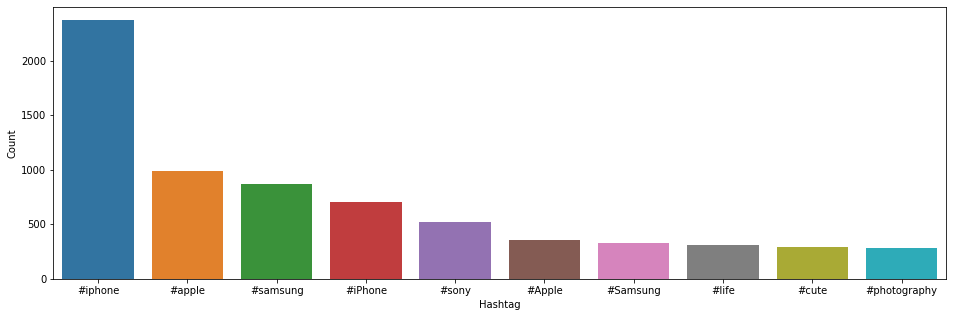

In [168]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

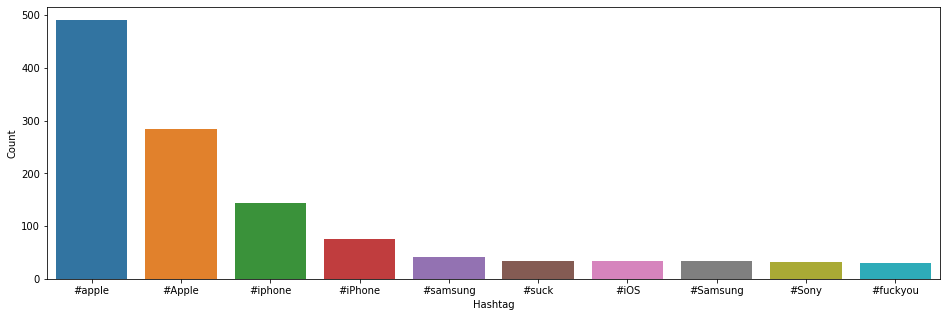

In [169]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# Bag of Words Features and TF-IDF

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df = 0.90, max_features = 300, stop_words = 'english')
vec = vectorizer.fit_transform(combined['clean text'])

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.9, max_features = 300, stop_words = 'english')
tf = tfidf.fit_transform(combined['clean text'])

# Building the model

Modelling based on the bag of words features

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_vec = vec[:7920,:]
test_vec = vec[7920:,:]

# splitting data into training and validation set
xtrain_vec, xvalid_vec, ytrain, yvalid = train_test_split(train_vec, train['label'], random_state=42, test_size=0.3)

lr = LogisticRegression()
lr.fit(xtrain_vec, ytrain) # training the model

prediction = lr.predict_proba(xvalid_vec) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.7595959595959597

In [173]:
test_pred = lr.predict_proba(test_vec)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lr_bagofwords.csv', index=False)

Modelling based on the TF-IDF features

In [174]:
train_tfidf = tf[:7920,:]
test_tfidf = tf[7920:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lr.fit(xtrain_tfidf, ytrain)

prediction = lr.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.7807933194154489

In [175]:
test_pred = lr.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_tfidf.csv', index=False)